In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.optimize import minimize

In [ ]:
#results = pd.read_csv('parametros_filtrados _covifree.csv')
results = pd.read_csv('parametros_filtrados_covidfree.csv', on_bad_lines='skip')
#results.columns

# Change name:
results = results.rename(columns={"filter": "factor"})

# Convert strings to numpy arrays:
column_strings = ['St','factor','prob_0','prob_1']
  # Limpieza y conversión (reemplazá 'columna_array' con el nombre real)
for col in column_strings:
    results[col] = results[col].apply(lambda x: np.fromstring(x.strip("[]").replace("\n", " "), sep=' '))
# Función para limpiar y convertir cada string
def limpiar_y_convertir(cadena):
    cadena_limpia = cadena.replace('[', '').replace(']', '').replace('\\n', '')
    return np.fromstring(cadena_limpia, sep=' ')

# Aplicar a toda la columna 'xt' y crear una nueva columna 'xt_array'
results['xt'] = results['xt'].apply(limpiar_y_convertir)

results.columns

Index(['gamma1', 'gamma2', 'gamma3', 'gamma4', 'gamma5', 'psi11', 'psi12',
       'sigma2_e1', 'psi21', 'psi22', 'sigma2_e2', 'psi31', 'psi32',
       'sigma2_e3', 'psi41', 'psi42', 'sigma2_e4', 'psi51', 'psi52',
       'sigma2_e5', 'mu_0', 'mu_1', 'sigma2_f', 'xt', 'sigma2_v', 'p00', 'p01',
       'p10', 'p11', 'St', 'factor', 'prob_0', 'prob_1'],
      dtype='object')

In [ ]:
def plot_histograms(df, columnas, guardar=False, nombre_archivo="histogramas.png"):
    n = len(columnas)
    filas = (n + 2) // 3  # Máximo 3 columnas por fila
    fig, axs = plt.subplots(filas, 3, figsize=(15, 5 * filas))
    axs = axs.flatten()

    for i, col in enumerate(columnas):
        # Saltarse los primeros 500 valores y eliminar NaNs
        data = df[col].iloc[500:].dropna()

        axs[i].hist(data, bins=30, color='skyblue', edgecolor='black')

        # Línea vertical en la media
        media = data.mean()
        axs[i].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')

        axs[i].set_title(f"Distribución de '{col}'")
        axs[i].set_xlabel(col)
        axs[i].set_ylabel("Frecuencia")
        axs[i].legend()

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()

    if guardar:
        plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')

    plt.show()


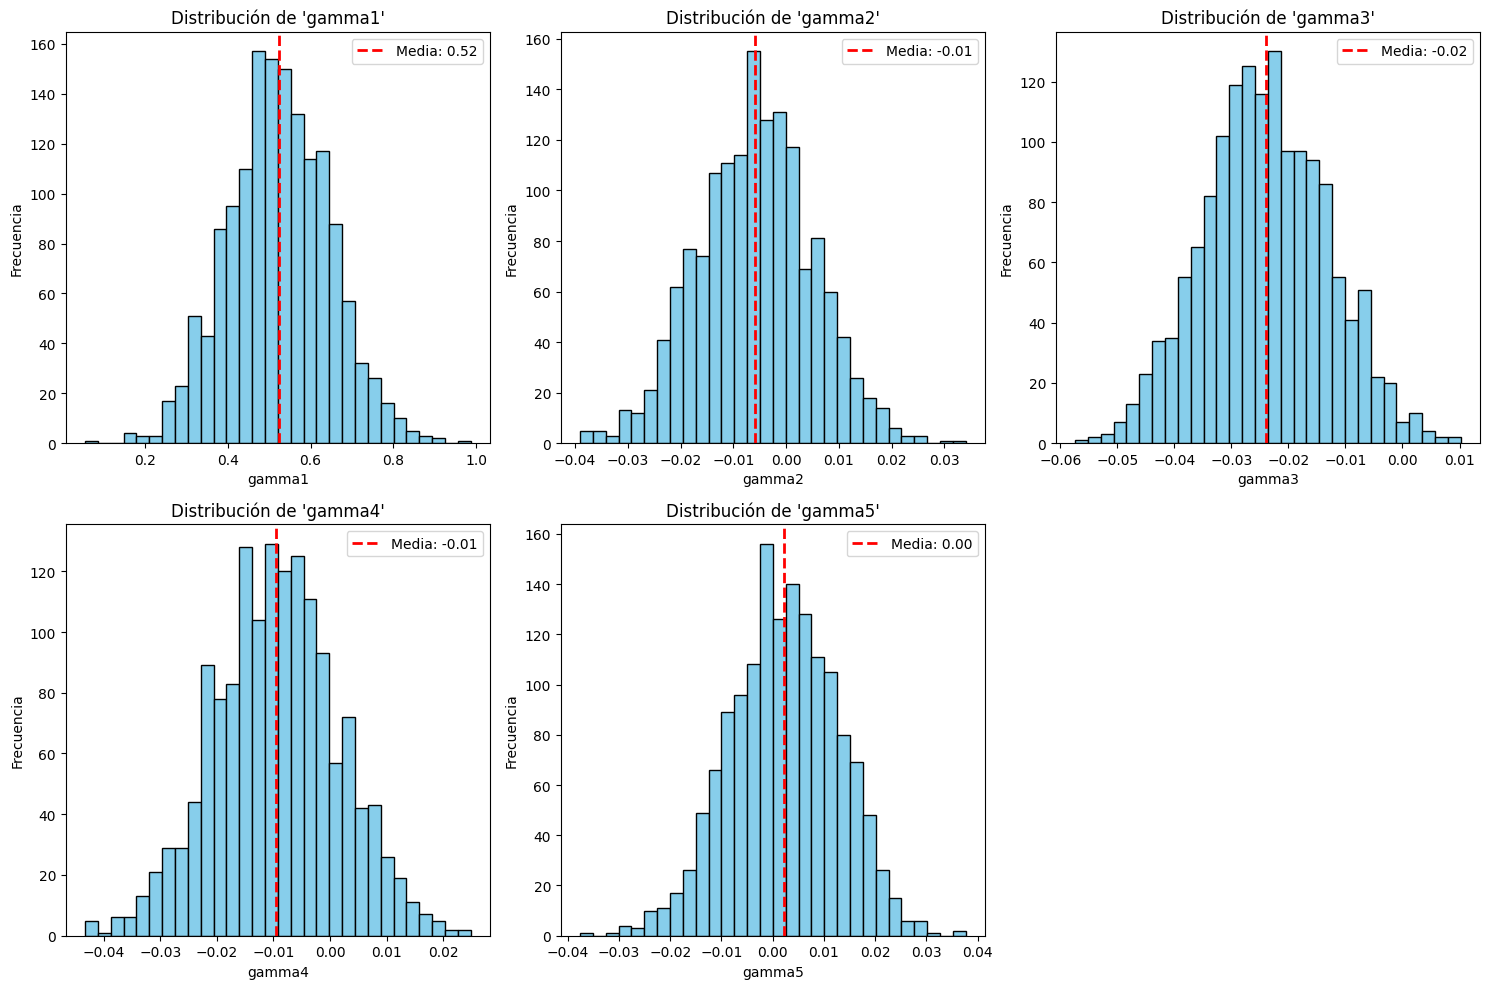

In [ ]:
plot_histograms(results, ["gamma1", "gamma2", "gamma3", "gamma4", "gamma5"], True,"histogramas1.png")


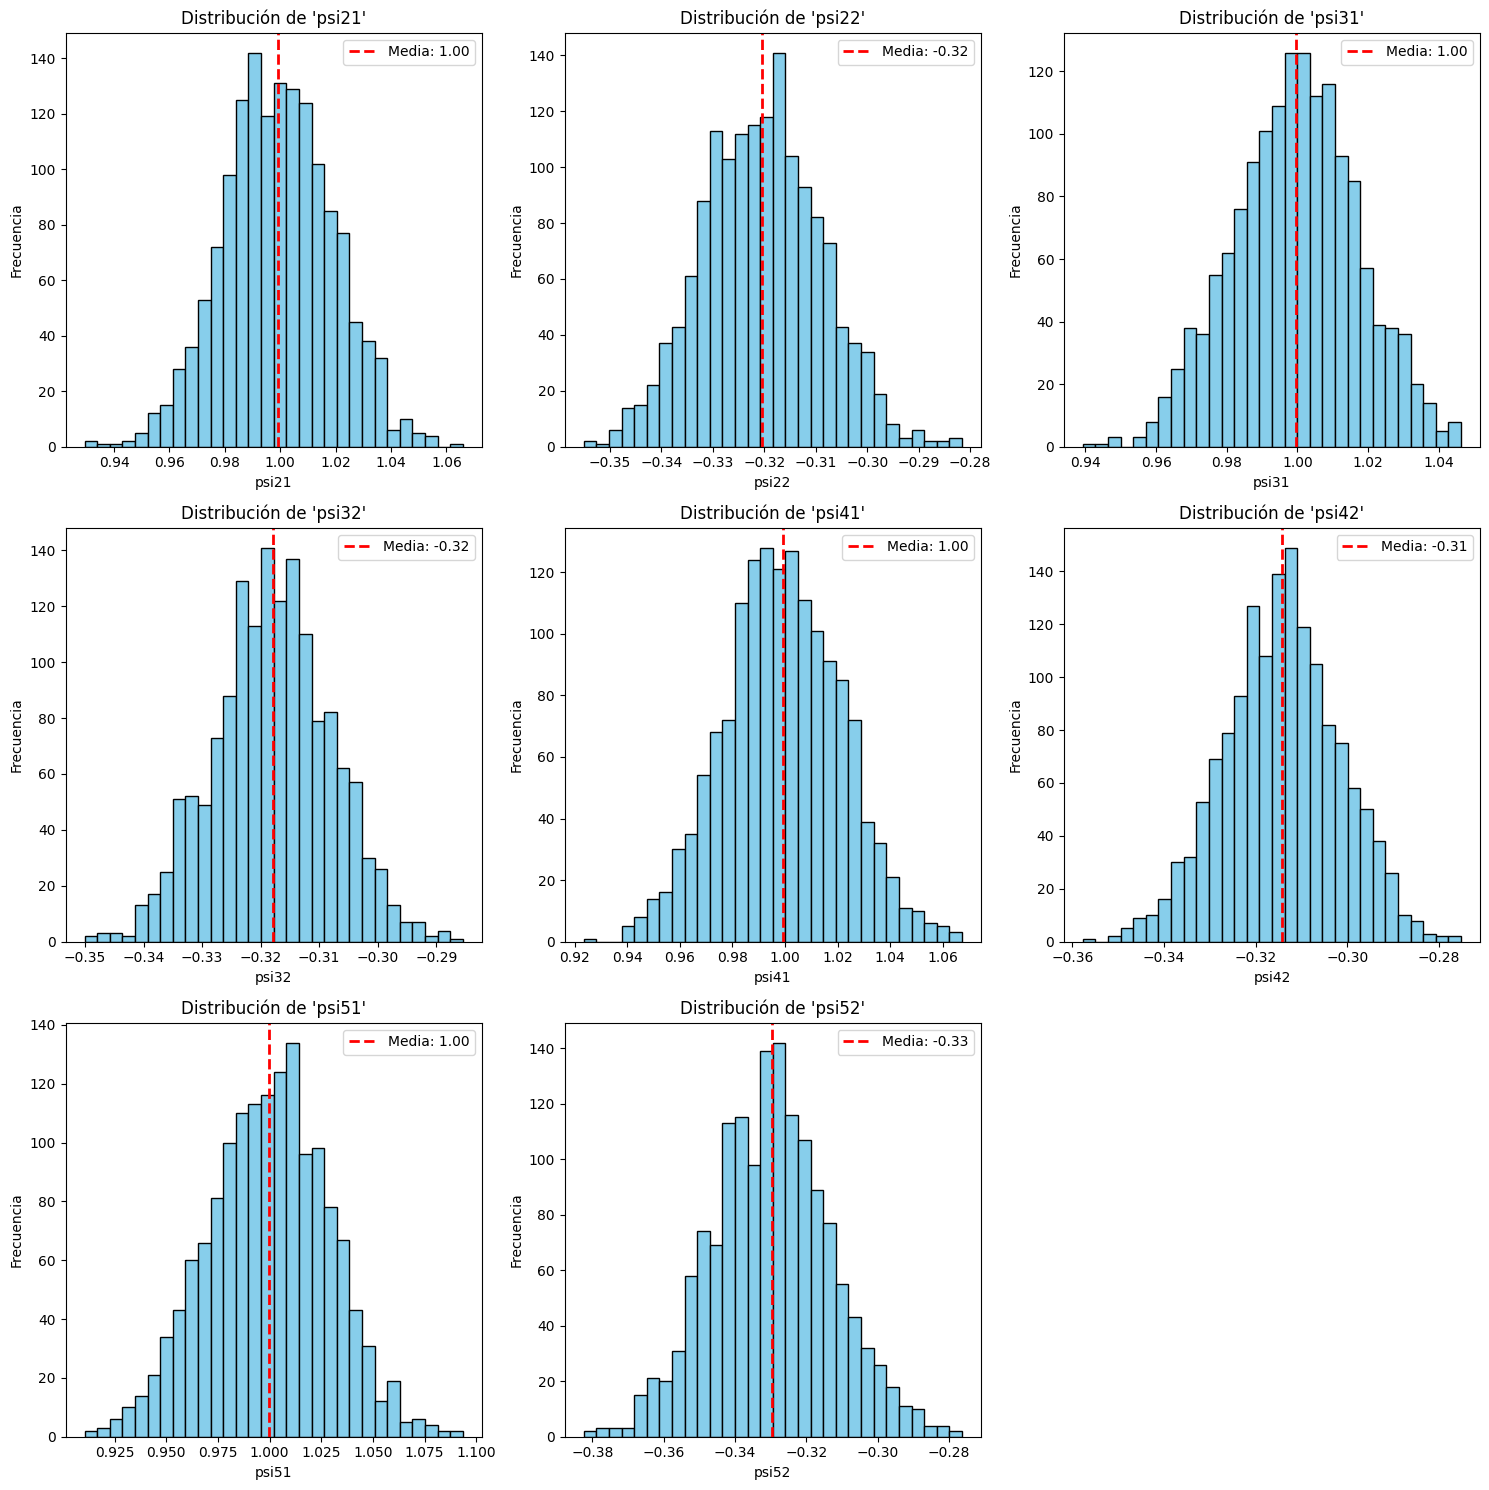

In [ ]:
plot_histograms(results, ["psi21", "psi22", "psi31", "psi32","psi41", "psi42","psi51","psi52"],True,"histogramas2.png")


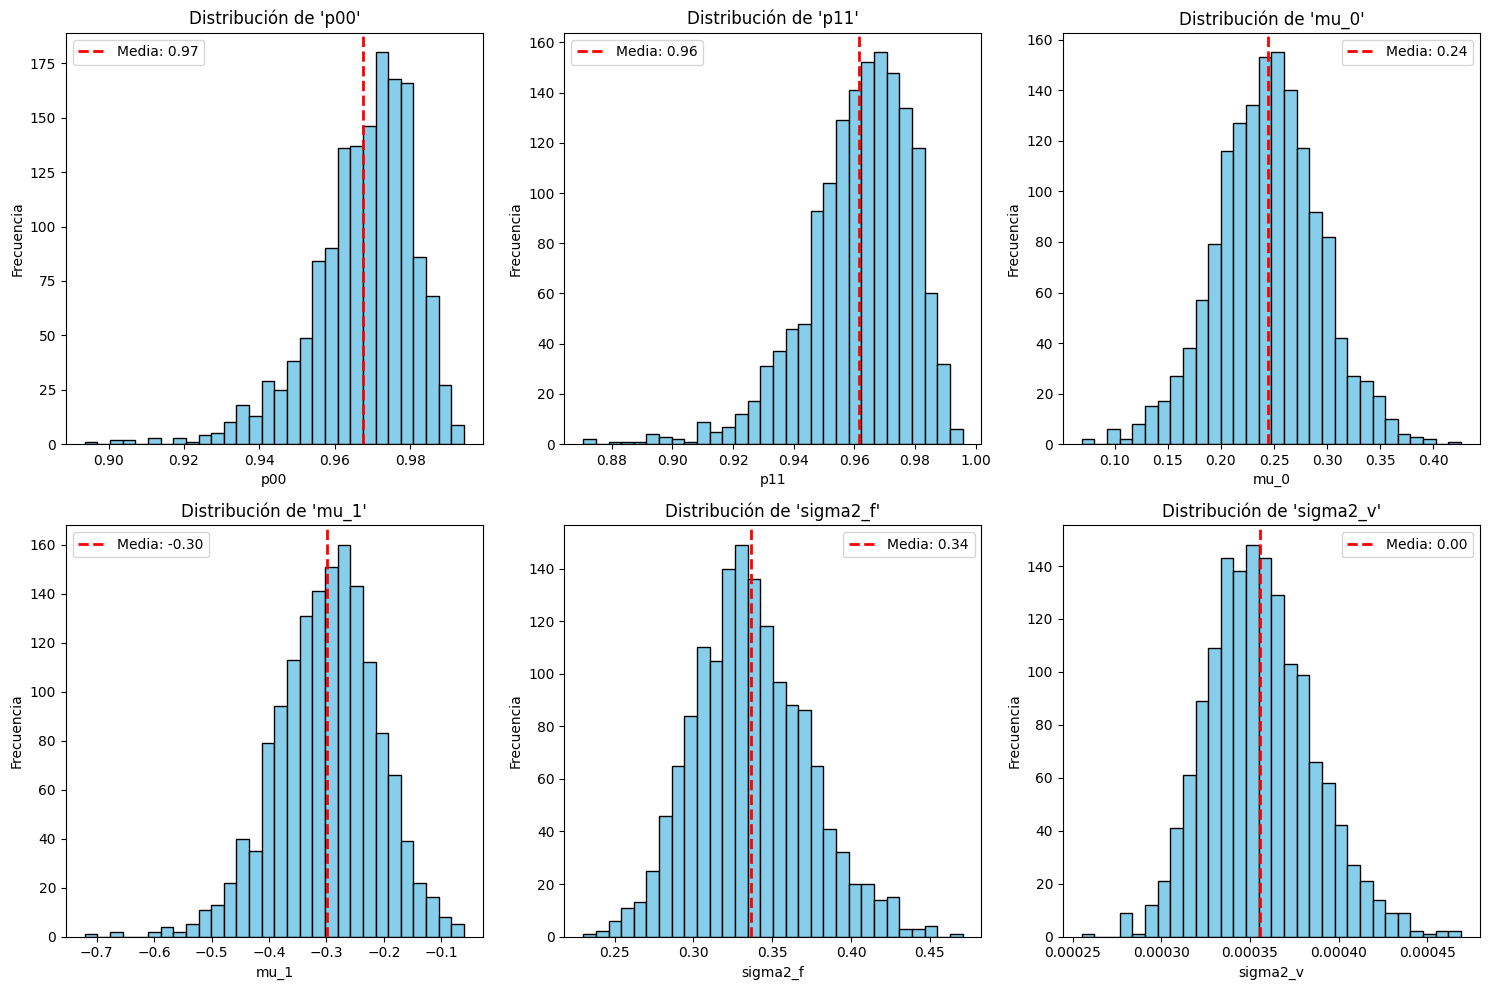

In [ ]:
plot_histograms(results, ["p00", "p11","mu_0","mu_1","sigma2_f","sigma2_v"],True,"histogramas3.png")

In [ ]:
USREC = pd.read_csv("USA_Recession_Data.csv")
USREC.columns
# Cargar los datos
data = pd.read_csv("USA_Normalize_Data.csv")
# Eliminar los últimos 100 datos
data = data.iloc[:-100, :]  # todas las filas excepto las últimas 100



In [ ]:
data

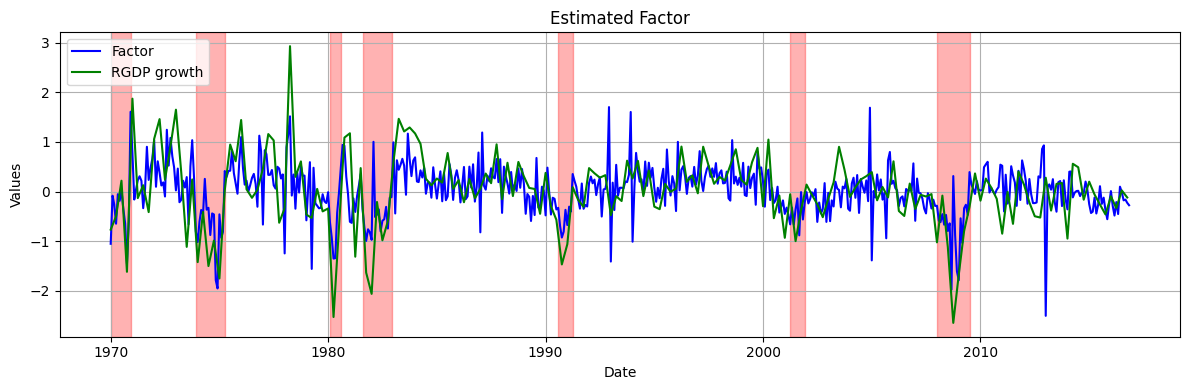

In [ ]:
# Asegurarse de que las fechas son datetime
USREC['observation_date'] = pd.to_datetime(USREC['observation_date'])

# Calcular la media de St descartando primeras 200 simulaciones
Series_draws = results['factor'][500:]  # Burn-in
Series_mean = np.mean(Series_draws, axis=0)

# Fechas para el eje x
fechas = USREC['observation_date'][:len(Series_mean)]

# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 4))

# ---- Añadir sombreado para recesión ----
recesion = USREC['USREC'][:len(Series_mean)].values
in_recession = False
for i in range(len(recesion)):
    if recesion[i] == 1 and not in_recession:
        start = i
        in_recession = True
    elif recesion[i] == 0 and in_recession:
        end = i
        ax.axvspan(fechas[start], fechas[end], color='red', alpha=0.3)
        in_recession = False
if in_recession:
    ax.axvspan(fechas[start], fechas.iloc[-1], color='red', alpha=0.3)

# ---- Plotear ambas series en el mismo eje ----
# Limpiar NaNs de data[:, 0]
data_line = data.iloc[:len(fechas), 0].copy()
mask = ~data_line.isna()

# Plot líneas
ax.plot(fechas, Series_mean, label='Factor', color='blue')
ax.plot(fechas[mask], data_line[mask], label='RGDP growth', color='green')

# Ejes y formato
ax.set_xlabel("Date")
ax.set_ylabel("Values")
ax.set_title("Estimated Factor")
ax.grid(True)
ax.legend(loc='upper left')
fig.tight_layout()

plt.savefig("Figure1.png", dpi=300, bbox_inches='tight')

plt.show()


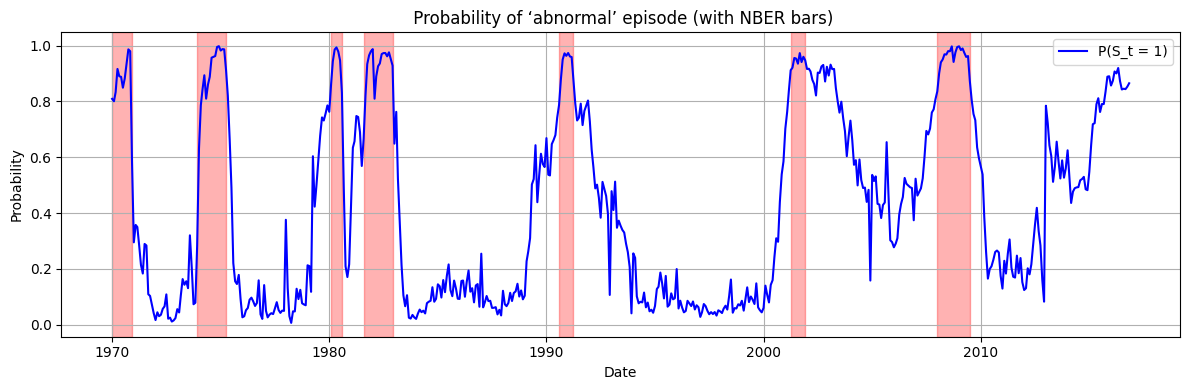

In [ ]:
# Asegurarse de que las fechas son datetime
USREC['observation_date'] = pd.to_datetime(USREC['observation_date'])

# Calcular la media de St descartando primeras 200 simulaciones
Series_draws = results['prob_1'][500:]  # Burn-in
Series_mean = np.mean(Series_draws, axis=0)  # Esto sigue con largo T

# Fechas para el eje x
fechas = USREC['observation_date'][:len(Series_mean)]

# Plot
plt.figure(figsize=(12, 4))

# ---- Añadir sombreado para recesión ----
recesion = USREC['USREC'][:len(Series_mean)].values

in_recession = False
for i in range(len(recesion)):
    if recesion[i] == 1 and not in_recession:
        start = i
        in_recession = True
    elif recesion[i] == 0 and in_recession:
        end = i
        plt.axvspan(fechas[start], fechas[end], color='red', alpha=0.3)
        in_recession = False
if in_recession:
    plt.axvspan(fechas[start], fechas.iloc[-1], color='red', alpha=0.3)

# ---- Probabilidad estimada de recesión ----
plt.plot(fechas, Series_mean, label='P(S_t = 1)', color='blue')

plt.legend()
plt.xlabel("Date")
plt.ylabel("Probability")
plt.title(" Probability of ‘abnormal’ episode (with NBER bars)")
plt.grid(True)
plt.tight_layout()

plt.savefig("Figure2.png", dpi=300, bbox_inches='tight')

plt.show()

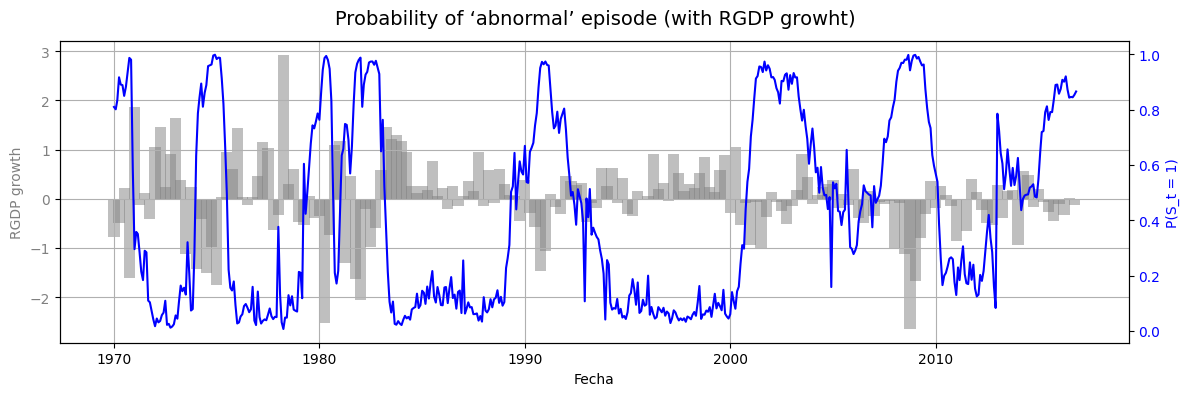

In [ ]:
# Asegurarse de que las fechas son datetime
USREC['observation_date'] = pd.to_datetime(USREC['observation_date'])

# Calcular la media de St descartando primeras 200 simulaciones
Series_draws = results['prob_1'][500:]  # Burn-in
Series_mean = np.mean(Series_draws, axis=0)  # Esto sigue con largo T

# Fechas para el eje x
fechas = USREC['observation_date'][:len(Series_mean)]

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 4))

# ---- Eje Y izquierdo: barras de la serie 'data[:, 0]' ----
ax1.bar(fechas, data.iloc[:, 0], width=200, color='gray', alpha=0.5)
ax1.set_ylabel("RGDP growth", color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

# ---- Eje Y derecho: línea de probabilidad ----
ax2 = ax1.twinx()
ax2.plot(fechas, Series_mean, color='blue')
ax2.set_ylabel("P(S_t = 1)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Eje X y leyendas
ax1.set_xlabel("Fecha")
fig.suptitle("Probability of ‘abnormal’ episode (with RGDP growht)", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
ax1.grid(True)

# Combinar leyendas de ambos ejes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.savefig("Figure3.png", dpi=300, bbox_inches='tight')

plt.show()


Not so well if we include COVID crisis:

In [ ]:
#results = pd.read_csv('parametros_filtrados _covifree.csv')
results1 = pd.read_csv('parametros_filtrados_COVID.csv', on_bad_lines='skip')
# Change name:
results1 = results1.rename(columns={"filter": "factor"})

# Convert strings to numpy arrays:
column_strings = ['St','factor','prob_0','prob_1']
  # Limpieza y conversión (reemplazá 'columna_array' con el nombre real)
for col in column_strings:
    results1[col] = results1[col].apply(lambda x: np.fromstring(x.strip("[]").replace("\n", " "), sep=' '))
# Función para limpiar y convertir cada string
def limpiar_y_convertir(cadena):
    cadena_limpia = cadena.replace('[', '').replace(']', '').replace('\\n', '')
    return np.fromstring(cadena_limpia, sep=' ')

# Aplicar a toda la columna 'xt' y crear una nueva columna 'xt_array'
results1['xt'] = results1['xt'].apply(limpiar_y_convertir)

results.columns

Index(['gamma1', 'gamma2', 'gamma3', 'gamma4', 'gamma5', 'psi11', 'psi12',
       'sigma2_e1', 'psi21', 'psi22', 'sigma2_e2', 'psi31', 'psi32',
       'sigma2_e3', 'psi41', 'psi42', 'sigma2_e4', 'psi51', 'psi52',
       'sigma2_e5', 'mu_0', 'mu_1', 'sigma2_f', 'xt', 'sigma2_v', 'p00', 'p01',
       'p10', 'p11', 'St', 'factor', 'prob_0', 'prob_1'],
      dtype='object')

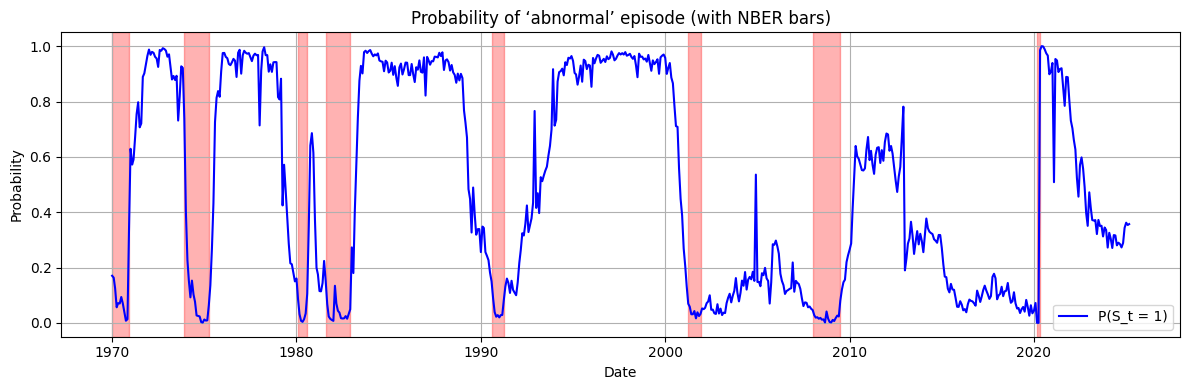

In [ ]:
# Asegurarse de que las fechas son datetime
USREC['observation_date'] = pd.to_datetime(USREC['observation_date'])

# Calcular la media de St descartando primeras 200 simulaciones
Series_draws = results1['prob_1'][500:]  # Burn-in
Series_mean = np.mean(Series_draws, axis=0)  # Esto sigue con largo T

# Fechas para el eje x
fechas = USREC['observation_date'][:len(Series_mean)]

# Plot
plt.figure(figsize=(12, 4))

# ---- Añadir sombreado para recesión ----
recesion = USREC['USREC'][:len(Series_mean)].values

in_recession = False
for i in range(len(recesion)):
    if recesion[i] == 1 and not in_recession:
        start = i
        in_recession = True
    elif recesion[i] == 0 and in_recession:
        end = i
        plt.axvspan(fechas[start], fechas[end], color='red', alpha=0.3)
        in_recession = False
if in_recession:
    plt.axvspan(fechas[start], fechas.iloc[-1], color='red', alpha=0.3)

# ---- Probabilidad estimada de recesión ----
plt.plot(fechas, Series_mean, label='P(S_t = 1)', color='blue')

plt.legend()
plt.xlabel("Date")
plt.ylabel("Probability")
plt.title("Probability of ‘abnormal’ episode (with NBER bars)")
plt.grid(True)
plt.tight_layout()

plt.savefig("Figure4.png", dpi=300, bbox_inches='tight')


plt.show()

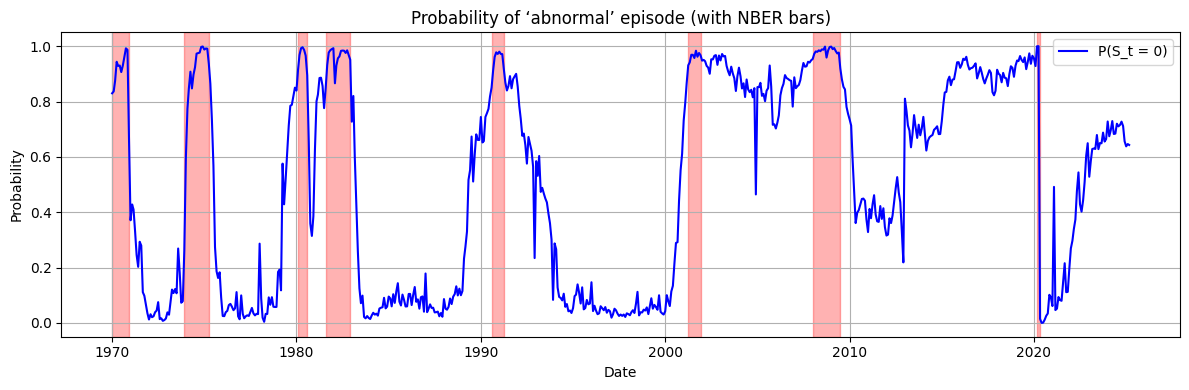

In [ ]:
# Asegurarse de que las fechas son datetime
USREC['observation_date'] = pd.to_datetime(USREC['observation_date'])

# Calcular la media de St descartando primeras 200 simulaciones
Series_draws = results1['prob_0'][500:]  # Burn-in
Series_mean = np.mean(Series_draws, axis=0)  # Esto sigue con largo T

# Fechas para el eje x
fechas = USREC['observation_date'][:len(Series_mean)]

# Plot
plt.figure(figsize=(12, 4))

# ---- Añadir sombreado para recesión ----
recesion = USREC['USREC'][:len(Series_mean)].values

in_recession = False
for i in range(len(recesion)):
    if recesion[i] == 1 and not in_recession:
        start = i
        in_recession = True
    elif recesion[i] == 0 and in_recession:
        end = i
        plt.axvspan(fechas[start], fechas[end], color='red', alpha=0.3)
        in_recession = False
if in_recession:
    plt.axvspan(fechas[start], fechas.iloc[-1], color='red', alpha=0.3)

# ---- Probabilidad estimada de recesión ----
plt.plot(fechas, Series_mean, label='P(S_t = 0)', color='blue')

plt.legend()
plt.xlabel("Date")
plt.ylabel("Probability")
plt.title("Probability of ‘abnormal’ episode (with NBER bars)")
plt.grid(True)
plt.tight_layout()

plt.savefig("Figure4_2.png", dpi=300, bbox_inches='tight')


plt.show()

### BONUS: FORECASTING,

$$
f_{t+1} = (1 - s_{t+1})\mu_0 + s_{t+1}\mu_1 + s_{t+1} x_{t+1} + \varepsilon_{t+1} \sim N(0,\sigma^2_{f})
$$

$$
x_{t+1} = s_tx_{t-1} + (1-s_t)v_t \sim N(0,\sigma^2_v)
$$

Que conocemos nostros?:
$$
\begin{bmatrix}
\mu_0 , \mu_1, \sigma^2_v, \sigma_f^2
\end{bmatrix}
$$

But we are missing something... $s_{t+1}$, No problemo becouse we do know $s_t$ and Transition Probabilities within $P$ ... 👍

Then we can do the following:

**If we are in 0:**                             

$p_{00} = 0.93$

Generate $u \sim \mathcal{U}(0,1)$:

if $u > 0.93:$

  $s_{t+1} = 1$

else:

$s_{t+1} = 0$


**If we are in 1:**                             

$p_{11} = 0.96$

Generate $u \sim \mathcal{U}(0,1)$:

if $u > 0.96:$

  $s_{t+1} = 0$

else:

$s_{t+1} = 1$




In [ ]:
# Cargar los datos
data_comp = pd.read_csv("USA_Normalize_Data.csv")
data_comp = data_comp.to_numpy()

In [ ]:
# Let's forecast:

# -- Values ----------------------------------
p00 = results['p00'].iloc[200:].dropna().mean()
p11 = results['p11'].iloc[200:].dropna().mean()

mu_0 = results['mu_0'].iloc[200:].dropna().mean()
mu_1 = results['mu_1'].iloc[200:].dropna().mean()

sigma2_v = results['sigma2_v'].iloc[200:].dropna().mean()
sigma2_f = results['sigma2_f'].iloc[200:].dropna().mean()


# st:
last = np.mean(results['St'][200:], axis=0)
last1 = last[len(last)-1] # getting last point of st
if last1 >= 0.5:
  last_period_st = 1
else:
  last_period_st = 0

# xt:
last2 = np.mean(results['xt'][200:], axis=0)

last_period_xt = last2[len(last2)-1]


# compute data available
total = len(data_comp[:,0])
# Calcular la media de St descartando primeras 200 simulaciones
factor_mean = np.mean(results['factor'][200:], axis=0)  # Esto sigue con largo T
# Asumimos que data[:, 0] es trimestral y tienes T meses
T = len(factor_mean)


H =  total - T;

factor_h = np.zeros(H)

st_pre = last_period_st;
xt_pre = last_period_xt;

for h in range(H):

  # compute st+h
  if st_pre == 0:
    u = np.random.uniform(0,1)
    if u > p00:
      st_h = 1
    else:
      st_h = 0
  elif st_pre == 1:
    u = np.random.uniform(0,1)
    if u > p11:
      st_h = 0
    else:
      st_h = 1

  xt_h = xt_pre + np.random.normal(0, np.sqrt(sigma2_v))

  factor_h[h] = (1-st_h)*mu_0 + st_h*mu_1 + st_h*xt_h + np.random.normal(0, sigma2_f)


factor_mean_extended = np.concatenate((factor_mean, np.full(H, np.nan)))
factor_h_extended = np.concatenate((np.full(T, np.nan), factor_h))


In [ ]:
# Cargar los datos
data_comp = pd.read_csv("USA_Normalize_Data.csv")


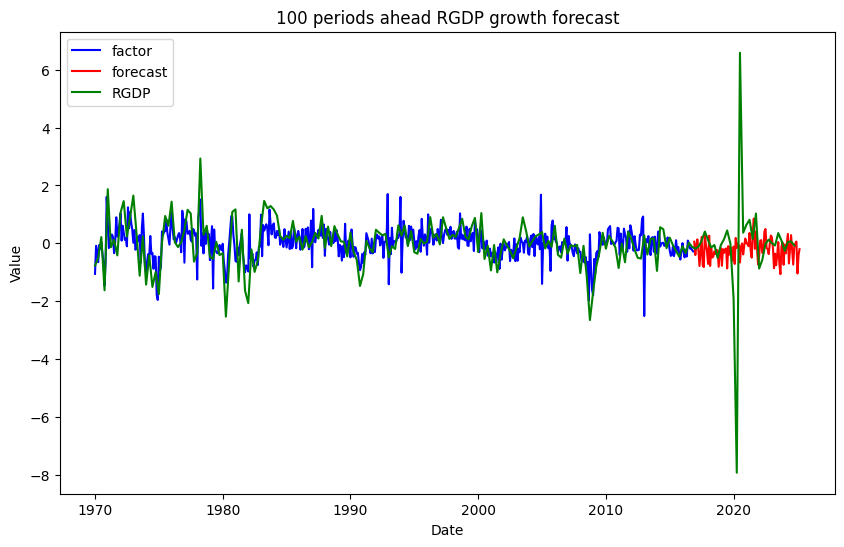

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Fechas para el eje x
fechas = USREC['observation_date'][:len(factor_h_extended)]

# Plot de factor_mean_extended en color azul
plt.plot(fechas, factor_mean_extended, label='factor', color='blue')
# Plot de factor_h_extended en color rojo
plt.plot(fechas, factor_h_extended, label='forecast', color='red')

# Plotear la serie trimestral 'data['RGDP']' ignorando NaNs
# Asegúrate que data_comp sea un DataFrame de pandas
data_line1 = data_comp.iloc[:T + H, 0]  # Toma la columna deseada hasta T+H
mask = ~data_line1.isna()               # Máscara para valores que no son NaN
plt.plot(fechas[mask], data_line1[mask], label='RGDP', color='green')

# Añadir etiquetas y leyenda
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'{H} periods ahead RGDP growth forecast')
plt.legend()

plt.savefig("Figure5.png", dpi=300, bbox_inches='tight')

# Mostrar gráfico
plt.show()
